### Here we have 2 Categories 
<ul>
   <li>Xrays of Normal Lungs</li>
   <li>Xrays of Lungs with Pneumonia</li>
</ul>  

### We can use Convolutional Nueral Networks to solve this classification problem
### Here in this dataset we see that there is a imbalance in data between the classes. This solved introduction exta class weight in class 1

## Importing Necessary Libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import random as random
import keras


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

## Importing the Images for Classification 

### Training Images

In [102]:
base_dir  = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
cate = os.listdir(base_dir)

#import the filw
image_size =100
data_array = []
for i in cate:
    path_ = os.path.join(base_dir , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img , (image_size , image_size))
        img = np.resize(img , (image_size , image_size,1))
        data_array.append([img , label])

#shuflling and splitting
np.random.shuffle(data_array)
x_train=[]
y_train=[]
for x_val , y_val in data_array:
    x_train.append(x_val)
    y_train.append(y_val)
x_train=np.array(x_train)
y_train=np.array(y_train)
del(data_array)



x_train.shape

(5216, 100, 100, 1)

### Test Images

In [103]:
base_dir_test = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
cate = os.listdir(base_dir_test)
data_array_test = []
for i in cate:
    path_ = os.path.join(base_dir_test , i)
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img , (image_size , image_size))
        img = np.resize(img , (image_size , image_size,1))
        data_array_test.append([img , label])

np.random.shuffle(data_array_test)
x_test=[]
y_test=[]
for x_val , y_val in data_array_test:
    x_test.append(x_val)
    y_test.append(y_val)
x_test=np.array(x_test)
y_test=np.array(y_test)
del(data_array_test)

x_test.shape

(624, 100, 100, 1)

### Validation Images

In [104]:

base_dir_val  = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
cate = os.listdir(base_dir_val)
data_array_val = []
for i in cate:
    path_ = os.path.join(base_dir_val , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img , (image_size , image_size))
        img = np.resize(img , (image_size , image_size,1))
        data_array_val.append([img , label])
        
np.random.shuffle(data_array_val)
x_val=[]
y_val=[]
for x_val_ , y_val_ in data_array_val:
    x_val.append(x_val_)
    y_val.append(y_val_)
    
x_val=np.array(x_val)
y_val=np.array(y_val)
del(data_array_val)

x_val.shape

(16, 100, 100, 1)

In [105]:
datagen = ImageDataGenerator(
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
        horizontal_flip = False) # I set this to true at first. It is horrible for the model to detect.
datagen.fit(x_train)

## Class Balance Checking 

<BarContainer object of 2 artists>

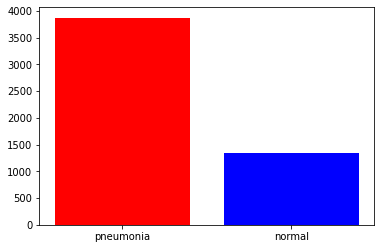

In [106]:
num_image_pne = len(y_train)-np.count_nonzero(y_train)
num_image_norm = np.count_nonzero(y_train)
plt.bar(["pneumonia" , "normal"] , [num_image_pne , num_image_norm] , color=('red','blue'))

## Normalising 

In [107]:
x_train=x_train/255.0
x_test=x_test/255.0
x_val = x_val/255.0

## Weight Balancing

In [123]:
we_norm = len(x_train)/num_image_norm
we_phen = len(x_train)/num_image_pne
class_weight={0:round(we_phen) , 1:round(we_norm)}
class_weight

{0: 1, 1: 4}

## Building Convolutional Model

In [124]:
model = Sequential()


model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, 3 , padding = 'same' ,input_shape = (100, 100, 1)))
model.add(keras.layers.Conv2D(16, 3, padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(32, 3, padding = 'same'))
model.add(keras.layers.Conv2D(32, 3, padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, 3, padding = 'same'))
model.add(keras.layers.Conv2D(64, 3, padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(50, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))


    
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam' , metrics=['accuracy'] , loss='binary_crossentropy') 


early_stopping = EarlyStopping(monitor='loss', verbose=1 ,patience=3)

In [125]:
history = model.fit(x_train ,y_train ,epochs=5 ,validation_data=(x_val , y_val) ,class_weight=class_weight , callbacks=early_stopping ,batch_size = 100)

Epoch 1/5
53/53 [==============================] - 2s 26ms/step - loss: 0.9934 - accuracy: 0.6175 - val_loss: 0.3892 - val_accuracy: 0.8125
Epoch 2/5
53/53 [==============================] - 1s 25ms/step - loss: 0.2014 - accuracy: 0.9482 - val_loss: 0.1082 - val_accuracy: 1.0000
Epoch 3/5
53/53 [==============================] - 1s 24ms/step - loss: 0.1606 - accuracy: 0.9584 - val_loss: 0.3225 - val_accuracy: 0.8125
Epoch 4/5
53/53 [==============================] - 1s 23ms/step - loss: 0.1954 - accuracy: 0.9477 - val_loss: 0.0785 - val_accuracy: 1.0000
Epoch 5/5
53/53 [==============================] - 1s 24ms/step - loss: 0.1315 - accuracy: 0.9658 - val_loss: 0.0506 - val_accuracy: 1.0000


In [126]:
model.evaluate(x_test , y_test)

20/20 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.8269


[0.5485437512397766, 0.8269230723381042]

## Model prediction 

In [127]:
pred = model.predict(x_test)
pred = (pred>0.5)




conf = confusion_matrix (pred , y_test)
acc = accuracy_score(y_test , pred)
cls_rpt = classification_report(y_test , pred )

## Evaluation using Confusion Matrix

In [128]:
print("Confusion Matrix")
print(conf)

Confusion Matrix
[[378  96]
 [ 12 138]]


In [129]:
print('Testing Accuracy')
print(acc)


Testing Accuracy
0.8269230769230769


In [130]:
print('Classification Report:')
print(cls_rpt)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       390
           1       0.92      0.59      0.72       234

    accuracy                           0.83       624
   macro avg       0.86      0.78      0.80       624
weighted avg       0.84      0.83      0.82       624



## Crossvalidation Graph

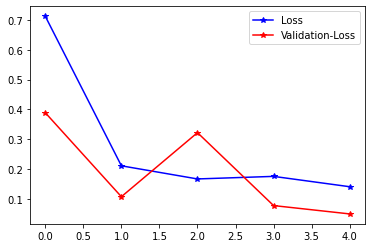

In [131]:
df = pd.DataFrame(history.history)
plt.plot(df.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.legend();